## Requirements

requirements.txt:

* networkx 3.1
* numpy 1.24.3
* matplotlib 3.7.2

Python version: 3.10.12. time and random are already built-in in the Python interpreter.

pip version: 23.2.1

In [26]:
import networkx
import time
import random
import numpy as np

In [35]:
# For random reproducibility
random.seed(10)

def connected_components(vertices, edges):
    G = networkx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(edges)
    Components = list(networkx.connected_components(G))
    return Components, len(Components)
if __name__ == "__main__":
    n = 7
    prob = 0.10
    V = list(range(1,n+1))
    E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
    print("vertices:", V)
    print("edges:", E)
    # (not required) graph as adjacency list:
    graph = {i: [j for j in V if j != i and (i,j) in E or (j,i) in E] for i in V}
    print("graph as adjacency list:", graph)
    start = time.process_time()
    print("number of connected components:", connected_components(V,E))
    end = time.process_time()
    print(f"CPU time used: {end - start} seconds")

vertices: [1, 2, 3, 4, 5, 6, 7]
edges: [(3, 6)]
graph as adjacency list: {1: [], 2: [], 3: [6], 4: [], 5: [], 6: [3], 7: []}
number of connected components: ([{1}, {2}, {3, 6}, {4}, {5}, {7}], 6)
CPU time used: 8.131500000008174e-05 seconds


## Time complexity

* Graph is written as an adjacency list
    * For each node, you can find its neighbours by traversing its adjacency list once (linear time) $\rightarrow \mathcal{O}(V)$
    * Each edge can appear twice, once for each vertex $\rightarrow \mathcal{O}(E)$

* In average case, the given graph is moderately sparse. So, O(|E|) = O(|V|). Therefore, O(|V| + |E|) = O(|V| + |V|) = O(|V|)

* In worst case, given graph is dense. So, O(|E|) = O(|$V^2$|). Therefore, O(|V| + |E|) = O(|V| + |$V^2$|) = O(|$V^2$|)

____

## Recursive solution, but blows up with 100,000+ nodes

Solução por base https://www.geeksforgeeks.org/connected-components-in-an-undirected-graph/, mas sem ser de programação orientada a objetos.

In [136]:
#Auxiliary functions

def adjacency(V, E):
    adjacency_list = {vertex: [] for vertex in V}

    for edge in E:
        u, v = edge  # Assuming each edge is a tuple (u, v)
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)  # For undirected graphs, add the reverse edge as well

    return adjacency_list

def dfs(adj, node=0, visited=[], component=[]):
    visited[node] = True
    component.append(node)

    for neighbor in adj[node]:
        if visited[neighbor]==False:
            dfs(adj, neighbor, visited, component)

def connected_components_util(adj):
    num_vertices = len(adj)
    visited = [False for i in range(num_vertices)]
    components = []

    for node in range(num_vertices):
        if visited[node]==False:
            component = []
            dfs(adj, node, visited, component)
            #if len(component) > 1: #discards isolated nodes, same interpretation as the networkx solution
            components.append(component)

    return components

#####
#################
#####

#Aggregate into 1 function
def third_connected_components(V,E):
    adjacency_list = adjacency(V,E)
    components = connected_components_util(adjacency_list)
    return components, len(components)

In [137]:
#Example of usage

V = [0,1,2,3,4,5]
E = [(0,1),(0,2),(0,3),(2,3),(2,4)]

adj = adjacency(V, E)

result = third_connected_components(V,E)
print(result)

([[0, 1, 2, 3, 4], [5]], 2)


__

## Alternative solution, does not blow up with 100,000 nodes, but is slower

In [64]:
#Auxiliary functions

def adjacency(V, E):
    adjacency_list = {vertex: [] for vertex in V}

    for edge in E:
        u, v = edge  # Assuming each edge is a tuple (u, v)
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)  # For undirected graphs, add the reverse edge as well

    return adjacency_list



class CCU:

    def __init__(self, adj):
        self.adj = adj
        self.num_vertices = len(adj)
        self.visited = [False for i in range(self.num_vertices)]
        self.component = []

    def dfs_sneaky_sneaky(self, node):
        stack = [node]
        while len(stack)>0:
            node2 = stack[-1]
            self.visited[node2] = True
            self.component.append(node2)
            new_node = False
            for neighbor in self.adj[node2]:
                if self.visited[neighbor]==False:
                    stack.append(neighbor)
                    new_node = True
                    break
            if not new_node:
                stack = stack[:-1]

    def connected_components_util(self):
        components = []

        for node in range(self.num_vertices):
            if self.visited[node]==False:
                #print("ccu ", node)
                self.component = []
                self.dfs_sneaky_sneaky(node)
                #if len(self.component) > 1: #discards isolated nodes, same interpretation as the networkx solution
                components.append(self.component)

        return components

#####
#################
#####

#Aggregate into 1 function
def fourth_connected_components(V,E):
    adjacency_list = adjacency(V,E)
    ccu = CCU(adjacency_list)
    components = ccu.connected_components_util()
    return components, len(components)

In [65]:
#Example of usage

V = [0,1,2,3,4,5]
E = [(0,1),(0,2),(0,3),(2,3),(2,4)]

adj = adjacency(V, E)
print(adj)

result = fourth_connected_components(V,E)
print(result)

{0: [1, 2, 3], 1: [0], 2: [0, 3, 4], 3: [0, 2], 4: [2], 5: []}
([[0, 1, 0, 2, 3, 2, 4, 2, 0], [5]], 2)


___

# Tests

In [67]:
# For random reproducibility
random.seed(10)

def checker(tries=60,prob=0.1):
    '''
    Checks if answer from connected_components() and my_connected_components() are the same
    '''
    ns = list(range(1,tries+1))
    for n in ns:
        V = list(range(n))
        E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
        graph = {i: [j for j in V if j != i and (i,j) in E or (j,i) in E] for i in V}
        
        results1 = connected_components(V,E)
        results2 = third_connected_components(V,E)
        results3 = fourth_connected_components(V,E)

        if (results1[1] != results2[1]) or (results1[1] != results3[1]) or (results2[1] != results3[1]):
            print("Failed!")
            print("Graph: ", graph)
            print("Results1: ", results1)
            print("Results2: ", results2)
            print("Results3: ", results3)
    print("All answers equal")

checker(50,prob=1)

All answers equal


In [70]:
def tester(starting_size=1, ending_size=50, steps=1,prob=0.1):
    ns = list(range(starting_size,ending_size,steps))
    results1 = []
    results2 = []
    results3 = []
    for n in ns:
        V = list(range(n))
        E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
        graph = {i: [j for j in V if j != i and (i,j) in E or (j,i) in E] for i in V}
        step1=[]
        step2=[]
        step3=[]
        for i in range(3):
            start = time.process_time()
            running1 = connected_components(V,E)
            end = time.process_time()
            step1.append(end-start)

            start = time.process_time()
            running2 = third_connected_components(V,E)
            end = time.process_time()
            step2.append(end-start)

            start = time.process_time()
            running3 = fourth_connected_components(V,E)
            end = time.process_time()
            step3.append(end-start)
            
        results1.append(np.mean(step1))
        results2.append(np.mean(step2))
        results3.append(np.mean(step3))
    return ns, results1, results2, results3

In [71]:
# For random reproducibility
random.seed(10)

tester(1,10,2)

([1, 3, 5, 7, 9],
 [3.565900000020624e-05,
  2.885166666658871e-05,
  5.256766666672519e-05,
  7.766899999979889e-05,
  8.647699999997371e-05],
 [8.04699999997401e-06,
  8.421999999915405e-06,
  1.691833333339332e-05,
  2.3472999999866555e-05,
  2.6599000000053035e-05],
 [1.0230333333212846e-05,
  1.1641000000099192e-05,
  2.489499999998775e-05,
  3.4982666666572015e-05,
  4.1663333333404516e-05])

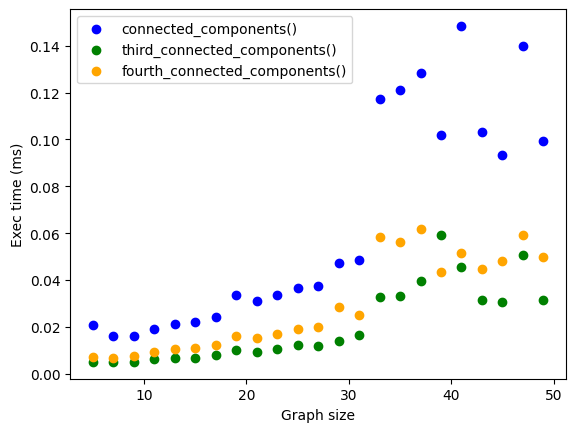

In [81]:
import matplotlib.pyplot as plt

# For random reproducibility
random.seed(10)

ns, results1, results2, results3 = tester(5,50,2)
plt.scatter(ns, np.array(results1)*1000, color="blue", label="connected_components()")
plt.scatter(ns, np.array(results2)*1000, color="green", label="third_connected_components()")
plt.scatter(ns, np.array(results3)*1000, color="orange", label="fourth_connected_components()")
plt.xlabel("Graph size")
plt.ylabel("Exec time (ms)")
plt.legend()

plt.savefig("5to50.png", format="png", dpi=600)
plt.show()

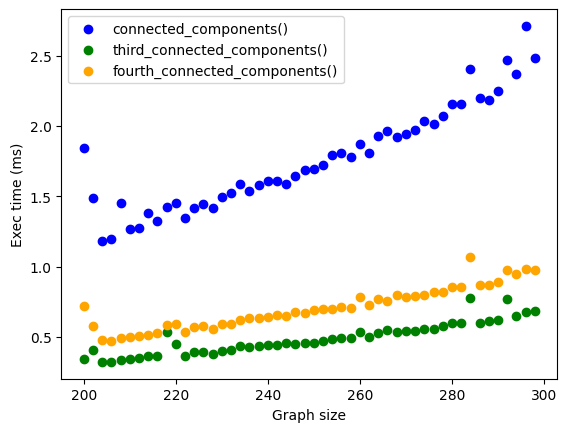

In [77]:
import matplotlib.pyplot as plt

# For random reproducibility
random.seed(10)

ns, results1, results2, results3 = tester(200,300,2)
plt.scatter(ns, np.array(results1)*1000, color="blue", label="connected_components()")
plt.scatter(ns, np.array(results2)*1000, color="green", label="third_connected_components()")
plt.scatter(ns, np.array(results3)*1000, color="orange", label="fourth_connected_components()")
plt.xlabel("Graph size")
plt.ylabel("Exec time (ms)")
plt.legend()

plt.savefig("200to300.png", format="png", dpi=600)
plt.show()

___

## Professor's tester

In [124]:
import networkx
import time
import random
import gzip
import sys

import numpy as np
import matplotlib.pyplot as plt

#from connected_components import connected_components
#from alternative_connected import alternative_connected, alternative_dfs
#from third_connected_components import adjacency, dfs, connected_components_util, third_connected_components
#from third_connected_components import third_connected_components

def mk_instance(n, k, r):
    """Set random seed to 'r' and create a graph withn 'n' vertices and (up to) n * k edges."""
    random.seed(r)
    V = list(range(0,n)) #ALTERED FOR NODES TO START IN 0
    E = set()
    for _ in range(n*k):
        i = random.randint(0,n-1)
        j = random.randint(0,n-1)
        if i != j:
            i, j = min(i,j), max(i,j)
            E.add((i,j))
    return V, E

if __name__ == "__main__":
    results1 = np.zeros([20,3])
    results2 = np.zeros([20,3])
    results3 = np.zeros([20,3])
    sys.setrecursionlimit(1000000) #otherwise RecursionError: maximum recursion depth exceeded
    #print(sys.getrecursionlimit())
    #sys.setrecursionlimit(1000000)

    for i,n in enumerate([100, 1000, 10000, 100000, 1000000]): #[1, 10, 100, 1000, 10000]
        for j,k in enumerate([1, 2, 5, 10]):
            iter = i*4+j
            V, E = mk_instance(n, k, 10) #Random seed 10
            print("Size: ", (len(V),len(E)))
            
            start = time.process_time()
            res1 = connected_components(V,E)[1]
            end = time.process_time()
            results1[iter,:] = (len(V), len(E), end-start)
            cpu = end - start
            #print(f"1st method: {cpu} seconds")

            if n<=10000:#100:
                start = time.process_time()
                res2 = third_connected_components(V,E)[1]
                end = time.process_time()
                results2[iter,:] = (len(V), len(E), end-start)
                cpu = end - start
                #print(f"2nd method: {cpu} seconds")
            
            if n<=100000:#1000:
                start = time.process_time()
                res3 = fourth_connected_components(V,E)[1]
                end = time.process_time()
                results3[iter,:] = (len(V), len(E), end-start)
                cpu = end - start
                #print(f"3rd method: {cpu} seconds")

Size:  (100, 98)
Size:  (100, 194)
Size:  (100, 467)
Size:  (100, 884)
Size:  (1000, 999)
Size:  (1000, 1997)
Size:  (1000, 4978)
Size:  (1000, 9895)
Size:  (10000, 9998)
Size:  (10000, 19991)
Size:  (10000, 49967)
Size:  (10000, 99884)
Size:  (100000, 99997)
Size:  (100000, 199995)
Size:  (100000, 499974)
Size:  (100000, 999888)
Size:  (1000000, 999999)
Size:  (1000000, 1999996)
Size:  (1000000, 4999966)
Size:  (1000000, 9999881)


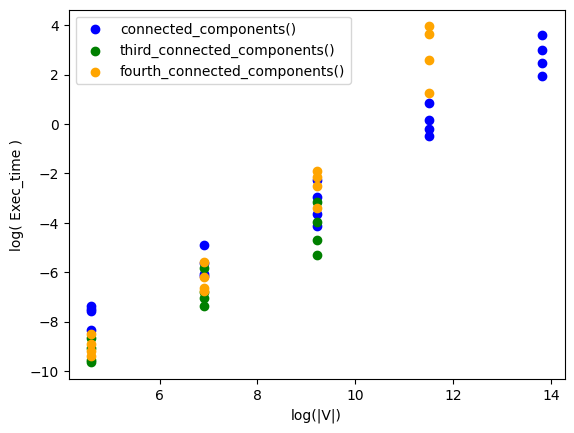

In [134]:
plt.scatter(np.log(results1[:,0]),np.log(results1[:,2]), color="blue", label="connected_components()")
plt.scatter(np.log(results2[:12,0]),np.log(results2[:12,2]), color="green", label="third_connected_components()")
plt.scatter(np.log(results3[:16,0]),np.log(results3[:16,2]), color="orange", label="fourth_connected_components()")

#plt.xlabel("Graph size (nº nodes)")
plt.xlabel("log(|V|)")
plt.ylabel("log( Exec_time )")
plt.legend()

plt.savefig("exec_log.png",format="png",dpi=600)

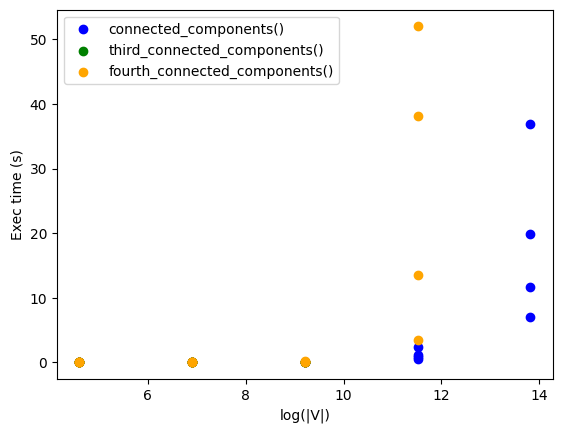

In [140]:
plt.scatter(np.log(results1[:,0]),results1[:,2], color="blue", label="connected_components()")
plt.scatter(np.log(results2[:12,0]),results2[:12,2], color="green", label="third_connected_components()")
plt.scatter(np.log(results3[:16,0]),results3[:16,2], color="orange", label="fourth_connected_components()")

#plt.xlabel("Graph size (nº nodes)")
plt.xlabel("log(|V|)")
plt.ylabel("Exec time (s)")
plt.legend()

plt.savefig("exec_time.png",format="png",dpi=600)

/tmp/ipykernel_7214/2983439428.py:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(results2[:,0],np.log(results2[:,2]), color="green", label="third_connected_components()")
/tmp/ipykernel_7214/2983439428.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(results3[:,0],np.log(results3[:,2]), color="orange", label="fourth_connected_components()")


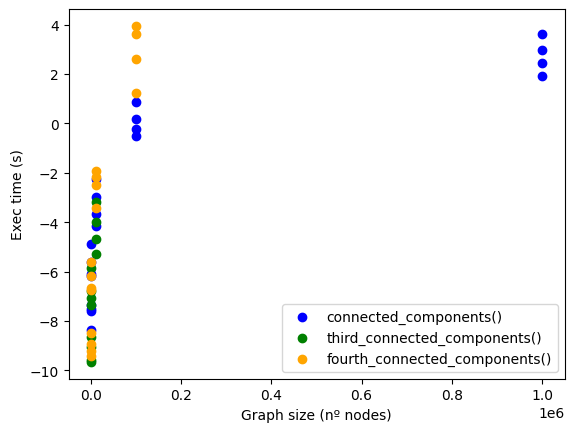

In [126]:
plt.scatter(results1[:,0],np.log(results1[:,2]), color="blue", label="connected_components()")
plt.scatter(results2[:,0],np.log(results2[:,2]), color="green", label="third_connected_components()")
plt.scatter(results3[:,0],np.log(results3[:,2]), color="orange", label="fourth_connected_components()")

plt.xlabel("Graph size (nº nodes)")
plt.ylabel("Exec time (s)")
plt.legend()